### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("ggplot")

### Load questions

In [2]:
df = pd.read_csv("combined_v1.csv").drop(columns="Unnamed: 0")

df.body = df.body.astype(bool)
df.prompt_in_front = df.prompt_in_front.astype(bool)
df.binarized = df.binarized.astype(bool)
df.binarized_v2 = (df.binarized_v2 == 1)

df["n_classes"] = df.classes.str.count(",") + 1
df["baseline_acc"] = 1 / df.n_classes
df["baseline_loss"] = -np.log(df.baseline_acc)

assert len(df[(df.binarized & (df.n_classes != 2))]) == 0
assert len(df[(~df.binarized & (df.n_classes == 2))]) == 0

df

,prompt,classes,answer_index,source_dataset,Q_id,body,prompt_in_front,binarized,binarized_v2,n_classes,baseline_acc,baseline_loss
0,Rate how much do you agree with the following ...,"[' 1', ' 2', ' 3', ' 4', ' 5']",0,MACH,Q1,False,True,False,False,5,0.200000,1.609438
1,Rate how much do you agree with the following ...,"[' 1', ' 2', ' 3', ' 4', ' 5']",0,MACH,Q2,False,True,False,False,5,0.200000,1.609438
2,Rate how much do you agree with the following ...,"[' 1', ' 2', ' 3', ' 4', ' 5']",4,MACH,Q3,False,True,False,False,5,0.200000,1.609438
3,Rate how much do you agree with the following ...,"[' 1', ' 2', ' 3', ' 4', ' 5']",4,MACH,Q4,False,True,False,False,5,0.200000,1.609438
4,Rate how much do you agree with the following ...,"[' 1', ' 2', ' 3', ' 4', ' 5']",0,MACH,Q5,False,True,False,False,5,0.200000,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...
1471,Statement: How much do you agree or disagree ...,"[' 1', ' 2']",1,sd3,P7,False,False,True,False,2,0.500000,0.693147
1472,Please rate your agreement or disagreement wit...,"[' 1', ' 3', ' 5']",0,sd3,P9,False,True,False,False,3,0.333333,1.098612
1473,Statement: I’ll say anything to get what I wan...,"[' 1', ' 3', ' 5']",0,sd3,P9,False,False,False,False,3,0.333333,1.098612
1474,Please rate your agreement or disagreement wit...,"[' 1', ' 2']",0,sd3,P9,False,True,True,False,2,0.500000,0.693147


In [3]:
df.source_dataset.unique()

array(['MACH', 'NPI', 'RSE', 'dass', 'tma', 'beck_hopelessness',
       'depression_scenarios', 'geriatric_depression',
       'levenson_selfreport_psychopathy', 'mmpi', 'phq9', 'cfcs', 'hbds',
       'hsns+dd', 'sd3'], dtype=object)

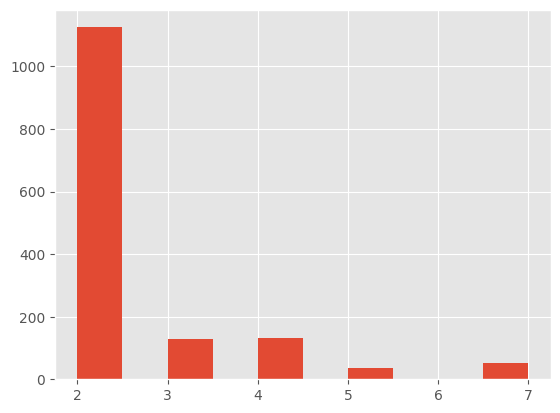

In [4]:
df.n_classes.hist(bins=10);

### Load evaluation results

In [5]:
CSV_MAP: dict[str, str] = {
    "ada": "combined_v1_gpt3/classification/ada.csv",
    "babbage": "combined_v1_gpt3/classification/babbage.csv",
    "curie": "combined_v1_gpt3/classification/curie.csv",
    "davinci": "combined_v1_gpt3/classification/davinci.csv",
    "ada_rlhf": "combined_v1_gpt3_rlhf/classification/text-ada-001.csv",
    "babbage_rlhf": "combined_v1_gpt3_rlhf/classification/text-babbage-001.csv",
    "curie_rlhf": "combined_v1_gpt3_rlhf/classification/text-curie-001.csv",
    "davinci_rlhf": "combined_v1_gpt3_rlhf/classification/text-davinci-001.csv",
    "opt_125m": "combined_v1_opt/classification/opt-125m.csv",
    "opt_350m": "combined_v1_opt/classification/opt-350m.csv",
    "opt_1_3b": "combined_v1_opt/classification/opt-1.3b.csv",
    "opt_2_7b": "combined_v1_opt/classification/opt-2.7b.csv",
}

In [6]:
for k, path in CSV_MAP.items():
    cur_df = pd.read_csv("results/" + path)

    assert len(df) == len(cur_df)

    df[f"loss_{k}"] = cur_df.loss
    df[f"correct_{k}"] = cur_df.correct
    df[f"partial_credit_{k}"] = cur_df.partial_credit

df.columns.sort_values()


Index(['Q_id', 'answer_index', 'baseline_acc', 'baseline_loss', 'binarized',
       'binarized_v2', 'body', 'classes', 'correct_ada', 'correct_ada_rlhf',
       'correct_babbage', 'correct_babbage_rlhf', 'correct_curie',
       'correct_curie_rlhf', 'correct_davinci', 'correct_davinci_rlhf',
       'correct_opt_125m', 'correct_opt_1_3b', 'correct_opt_2_7b',
       'correct_opt_350m', 'loss_ada', 'loss_ada_rlhf', 'loss_babbage',
       'loss_babbage_rlhf', 'loss_curie', 'loss_curie_rlhf', 'loss_davinci',
       'loss_davinci_rlhf', 'loss_opt_125m', 'loss_opt_1_3b', 'loss_opt_2_7b',
       'loss_opt_350m', 'n_classes', 'partial_credit_ada',
       'partial_credit_ada_rlhf', 'partial_credit_babbage',
       'partial_credit_babbage_rlhf', 'partial_credit_curie',
       'partial_credit_curie_rlhf', 'partial_credit_davinci',
       'partial_credit_davinci_rlhf', 'partial_credit_opt_125m',
       'partial_credit_opt_1_3b', 'partial_credit_opt_2_7b',
       'partial_credit_opt_350m', 'prompt',

### Plotting code
[Link to model sizes](https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline/blob/d7b0de68258525fddb2fb1f05091755ebaa24775/eval_pipeline/plot_loss.py#L19)

In [7]:
GPT3_SIZES = {
    # GPT-3 sizes are based on https://blog.eleuther.ai/gpt3-model-sizes/
    "ada": 350_000_000,
    "babbage": 1_300_000_000,
    "curie": 6_700_000_000,
    "davinci": 175_000_000_000,
}

GPT3_RLHF_SIZES = {
    "ada_rlhf": 350_000_000,
    "babbage_rlhf": 1_300_000_000,
    "curie_rlhf": 6_700_000_000,
    "davinci_rlhf": 175_000_000_000,
}

OPT_SIZES = {
    # opt sizes from their names
    "opt_125m": 125_000_000,
    "opt_350m": 350_000_000,
    "opt_1_3b": 1_300_000_000,
    "opt_2_7b": 2_700_000_000,
}

OGPT_SIZES = {"opt_125m": 125_000_000} | GPT3_SIZES

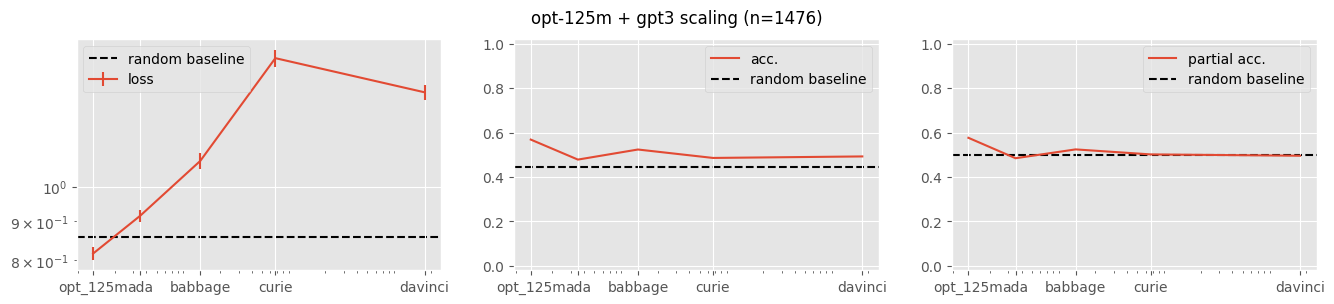

In [8]:
def gen_plots(
    df: pd.DataFrame,
    size_dict: dict[str, int],
    title: str = "",
):
    models = list(size_dict.keys())
    sizes = np.array(list(size_dict.values()))

    losses = np.array([df[f"loss_{m}"].mean() for m in models])
    loss_errs = np.array([df[f"loss_{m}"].std() for m in models]) / np.sqrt(len(df))
    accs = np.array([df[f"correct_{m}"].mean() for m in models])
    partial_accs = np.array([df[f"partial_credit_{m}"].mean() for m in models])

    plt.figure(figsize=(16, 3))
    plt.suptitle(title + f" (n={len(df)})")
    plt.tight_layout()

    def common_plot_setup(baseline: float):
        plt.axhline(
            baseline,
            linestyle="--",
            color="black",
            zorder=-1,
            label="random baseline",
        )
        plt.xscale("log")
        # plt.xlabel("Model size")
        plt.xticks(sizes, models)
        plt.legend()

    # Loss
    plt.subplot(1, 3, 1)
    plt.errorbar(sizes, losses, loss_errs, label="loss")
    plt.yscale("log")
    common_plot_setup(df.baseline_loss.mean())

    # Acc
    plt.subplot(1, 3, 2)
    plt.plot(sizes, accs, label="acc.")
    plt.ylim(-0.02, 1.02)
    common_plot_setup(df.baseline_acc.mean())

    # Partial acc
    plt.subplot(1, 3, 3)
    plt.plot(sizes, partial_accs, label="partial acc.")
    plt.ylim(-0.02, 1.02)
    common_plot_setup(0.5)


gen_plots(df, OGPT_SIZES, title="opt-125m + gpt3 scaling")


In [9]:
def comprehensive_plot(df: pd.DataFrame, name: str):
    gen_plots(df, OPT_SIZES, title=f"{name} - OPT Scaling")
    gen_plots(df, GPT3_SIZES, title=f"{name} - GPT3 Scaling")
    gen_plots(df, GPT3_RLHF_SIZES, title=f"{name} - GPT3 (rlhf) Scaling")

# Scaling laws by dataset


### All data

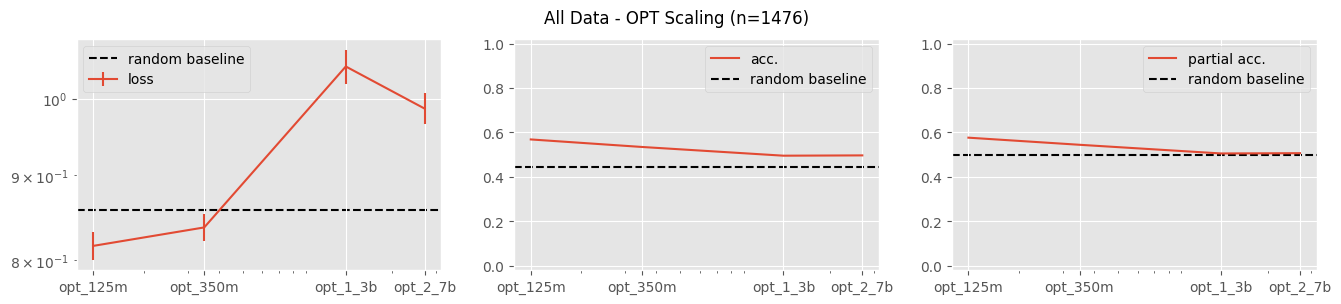

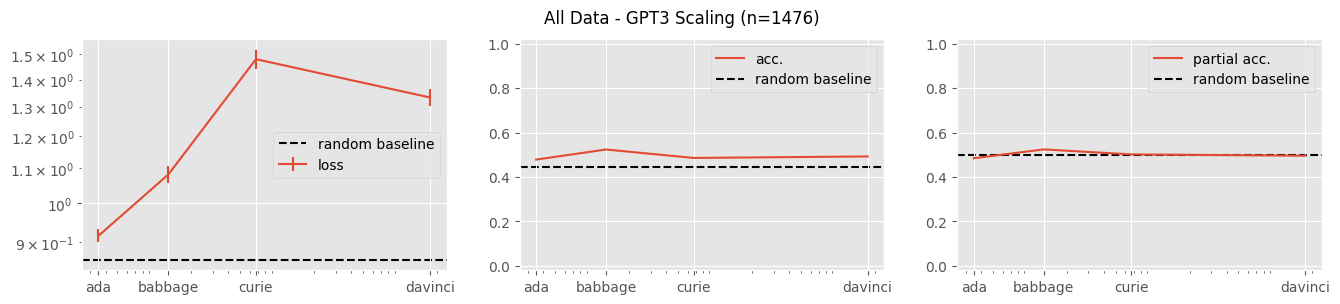

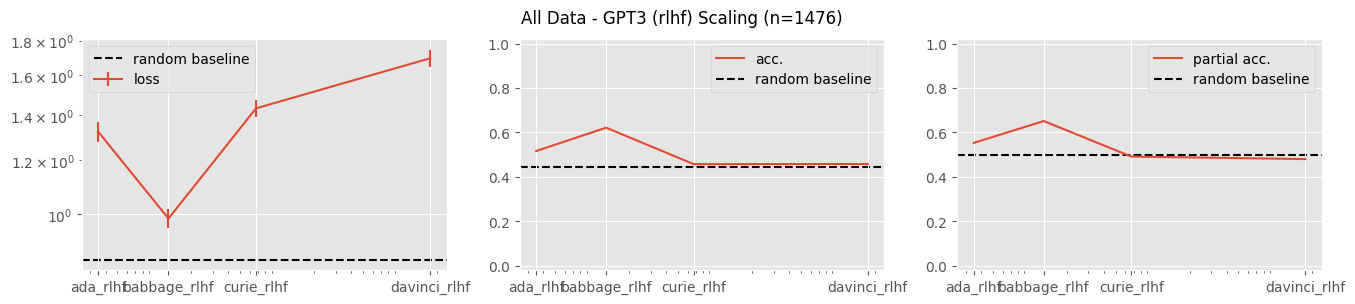

In [10]:
comprehensive_plot(df, name="All Data")

### Non-body

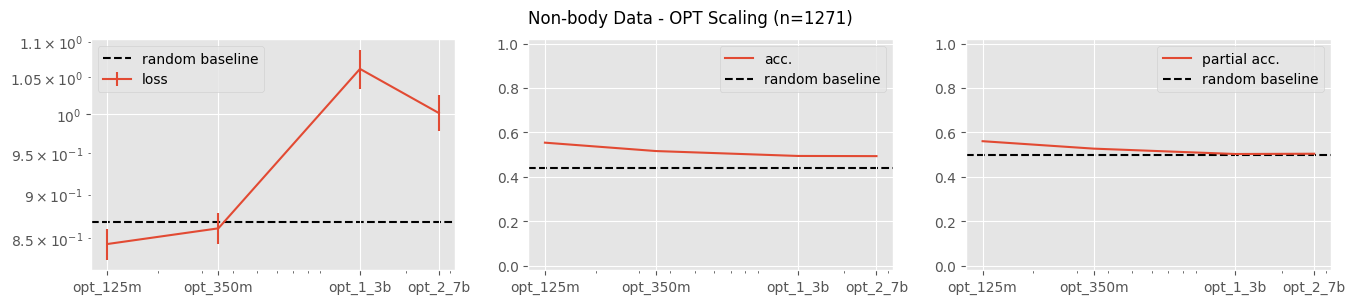

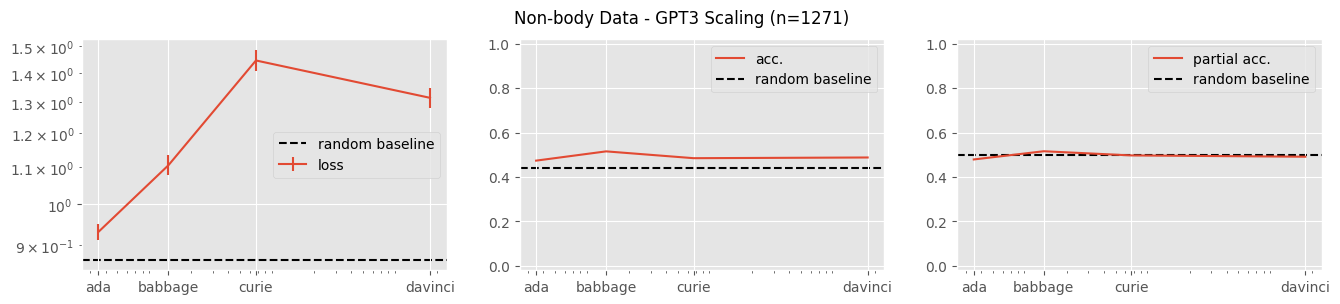

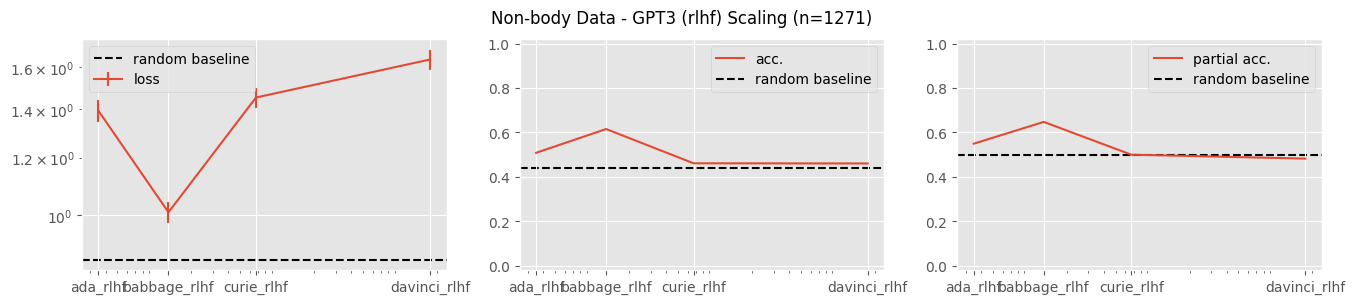

In [11]:
comprehensive_plot(df[~df.body], name="Non-body Data")

### Binary data

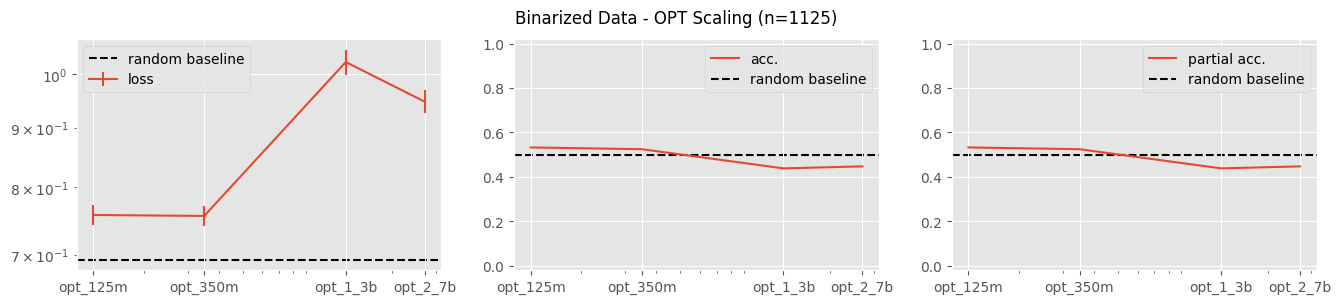

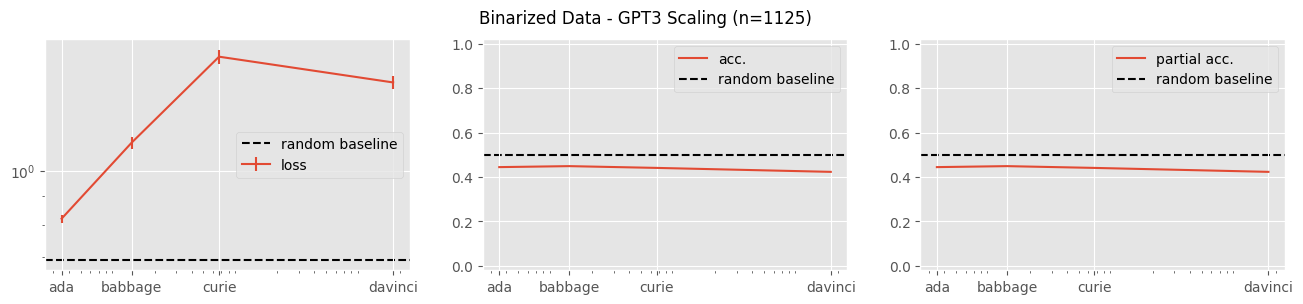

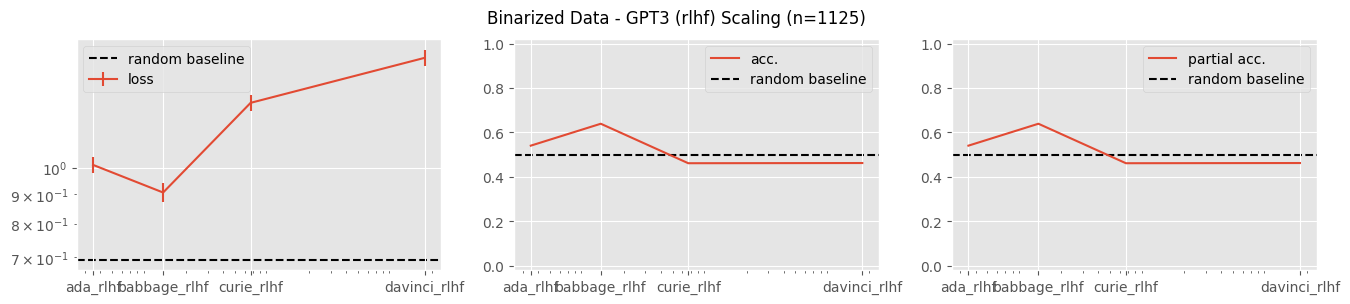

In [12]:
comprehensive_plot(df[df.binarized], name="Binarized Data")

### Prompt in front

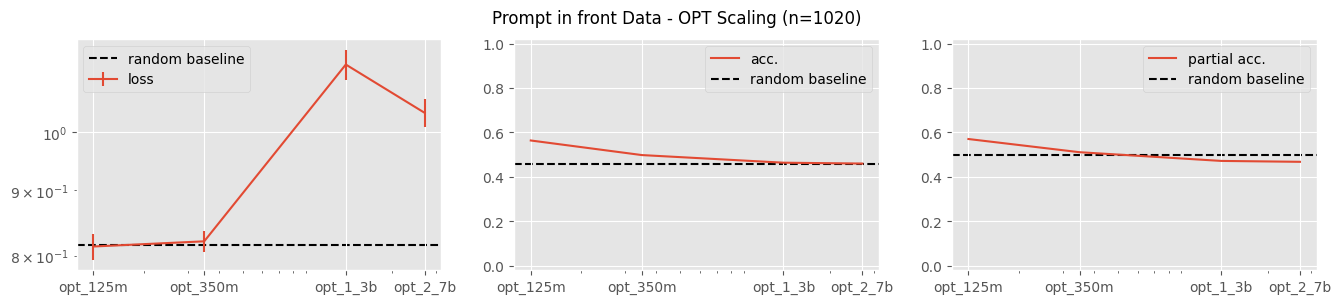

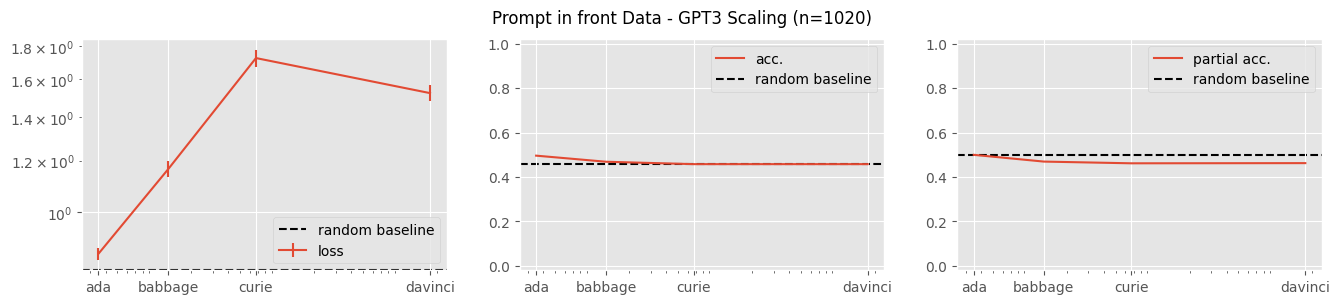

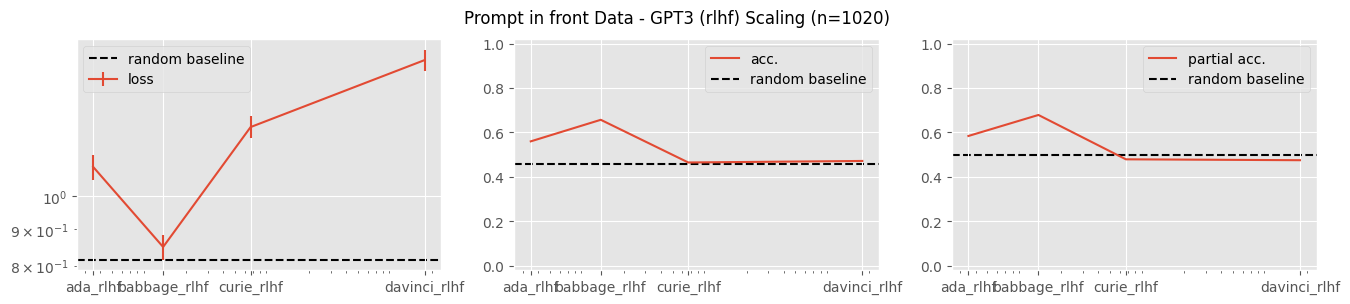

In [13]:
comprehensive_plot(df[df.prompt_in_front], name="Prompt in front Data")

### Prompt in back

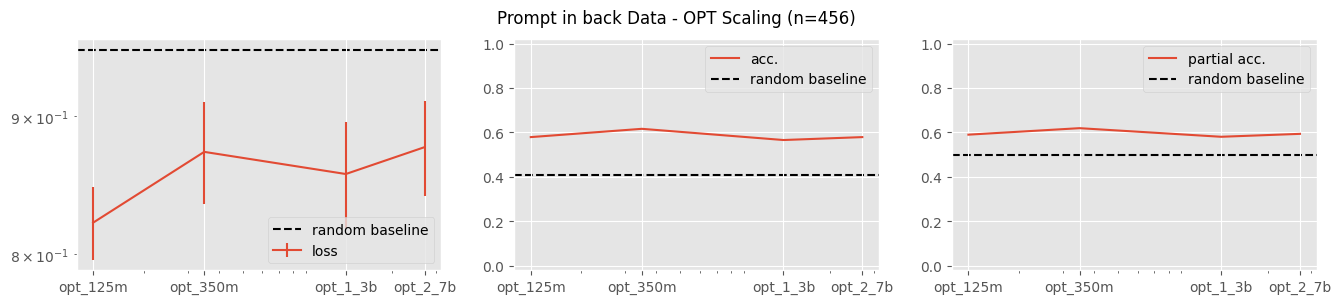

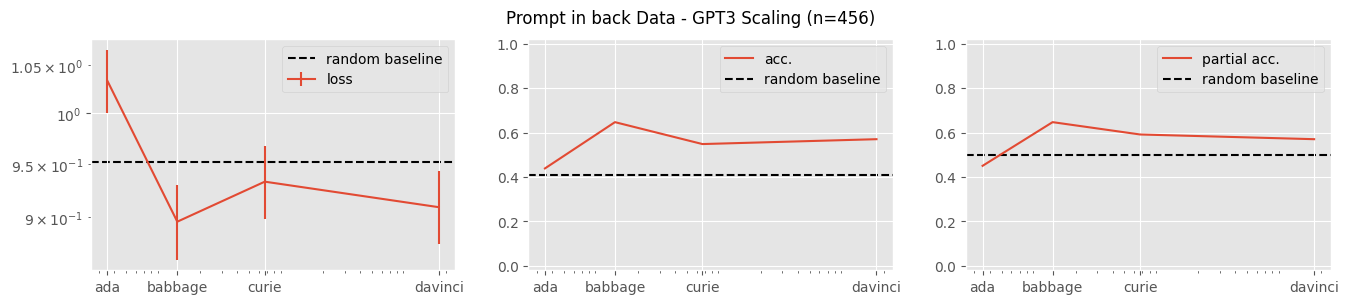

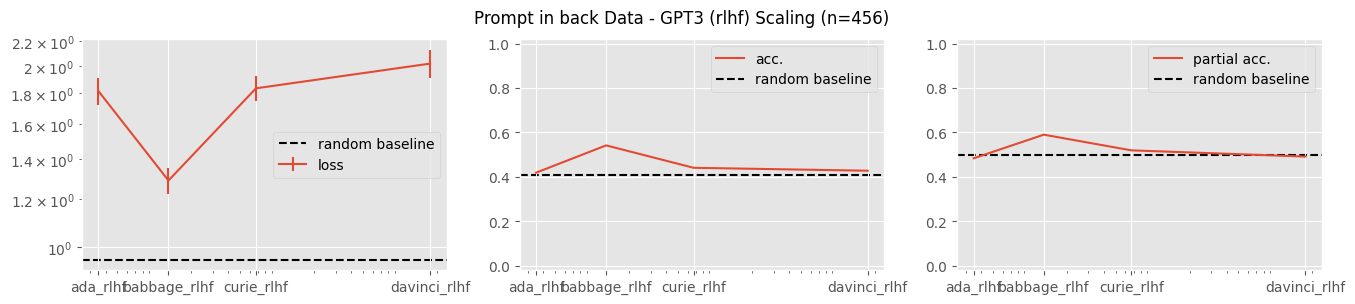

In [14]:
comprehensive_plot(df[~df.prompt_in_front], name="Prompt in back Data")

### MACH

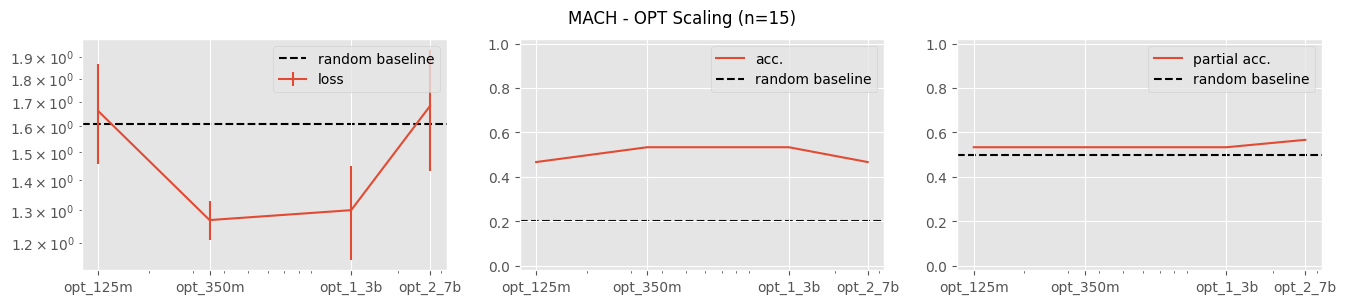

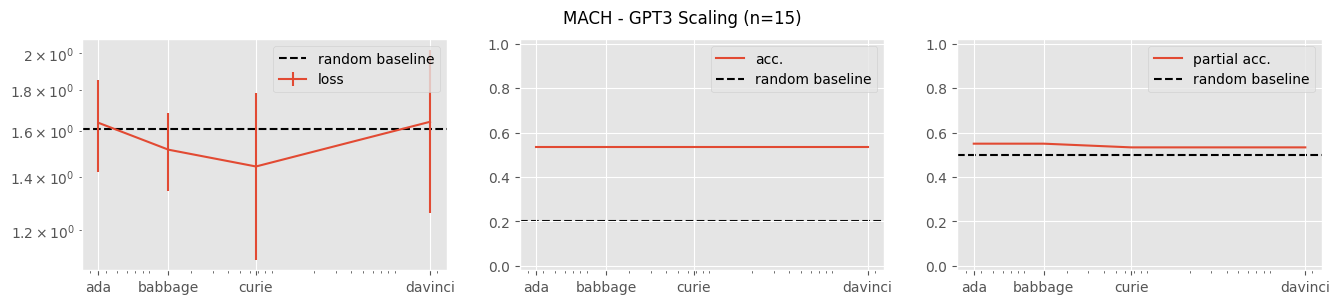

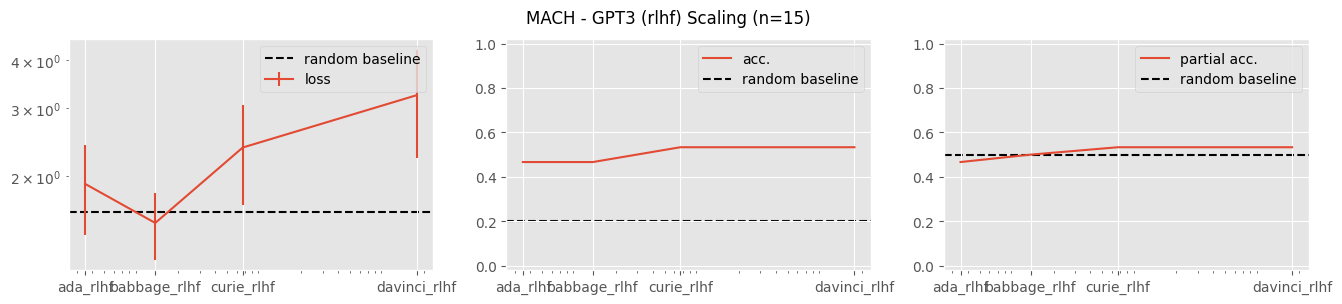

In [15]:
comprehensive_plot(df[df.source_dataset == "MACH"], name="MACH")

### NPI

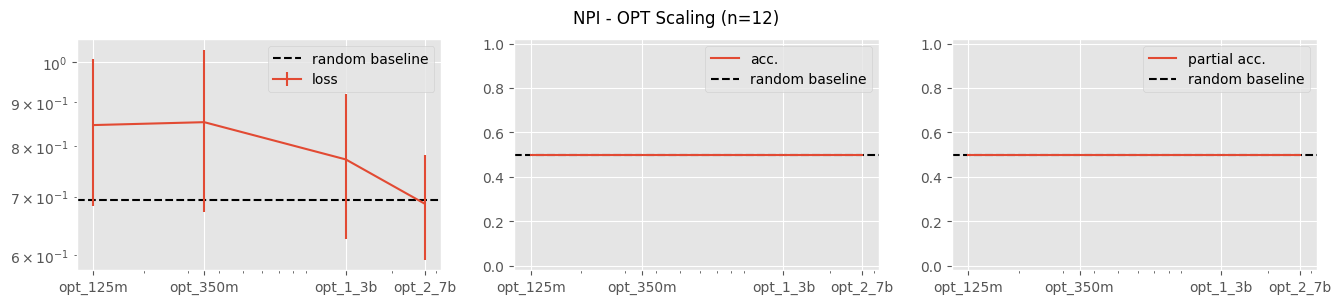

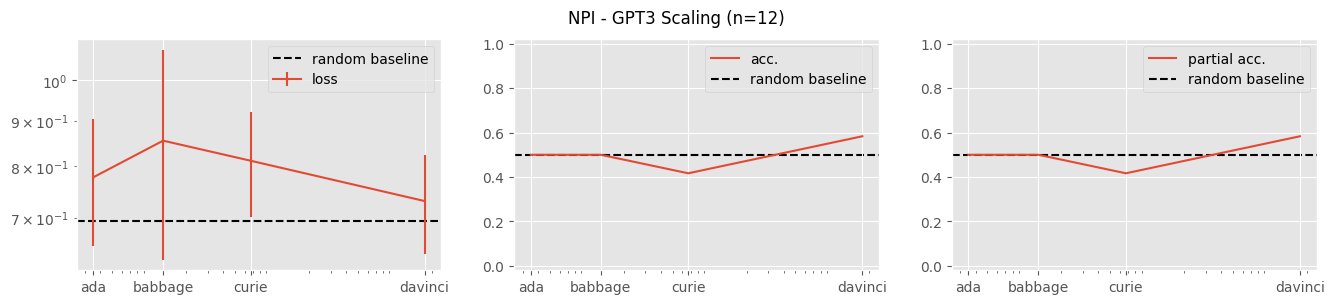

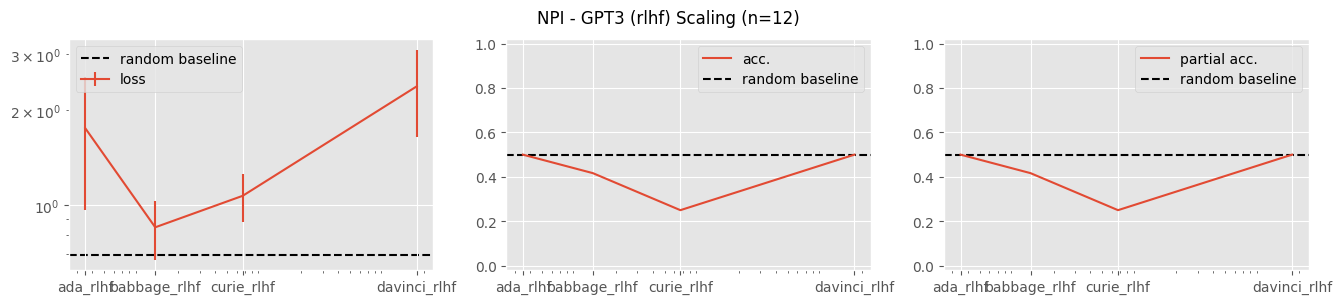

In [16]:
comprehensive_plot(df[df.source_dataset == "NPI"], name="NPI")

### RSE

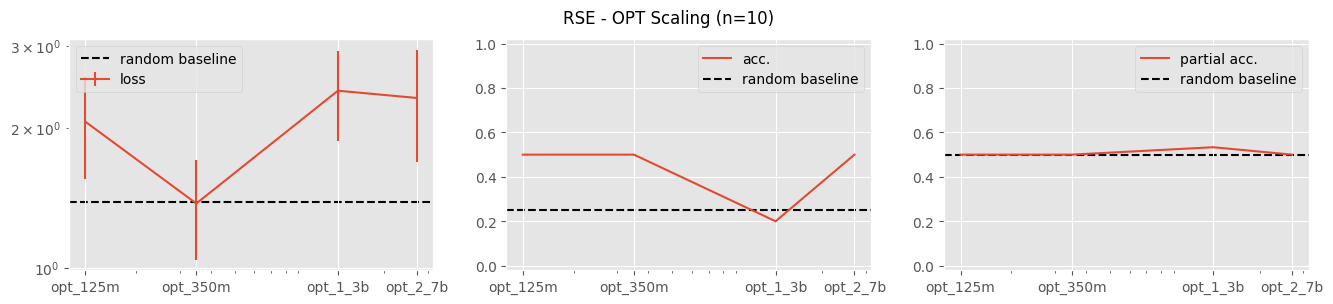

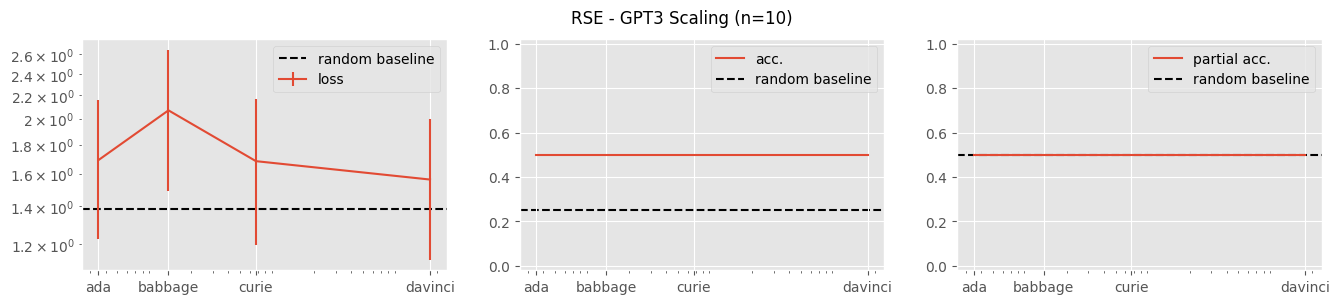

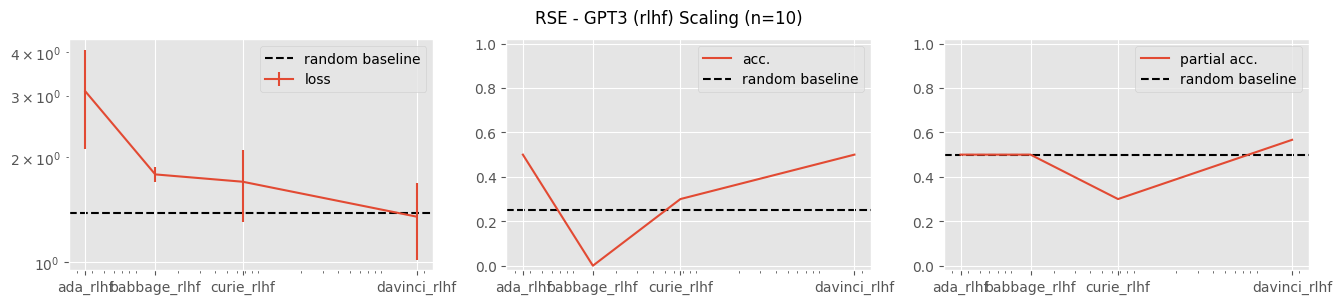

In [17]:
comprehensive_plot(df[df.source_dataset == "RSE"], name="RSE")

### DASS

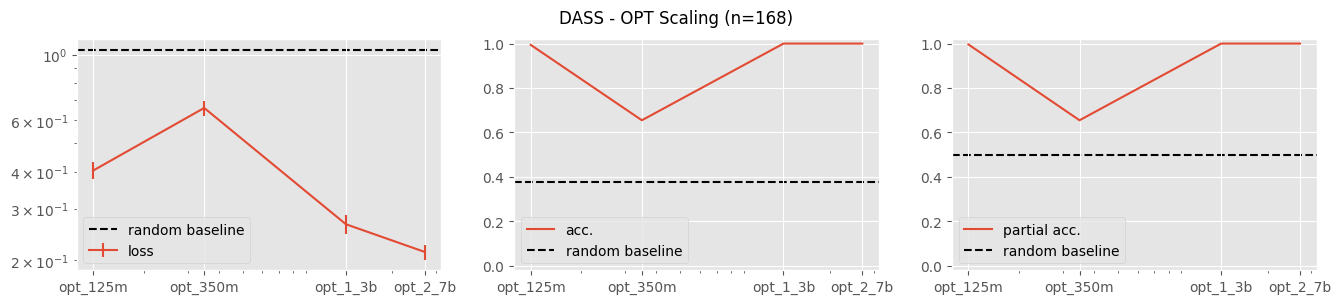

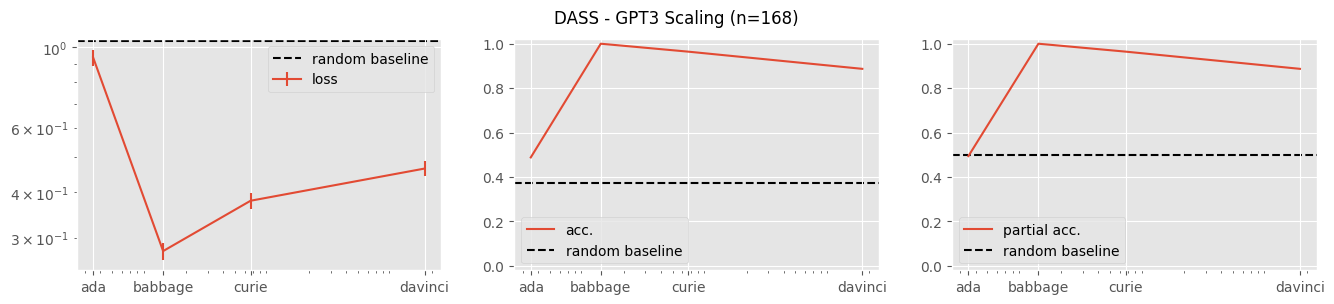

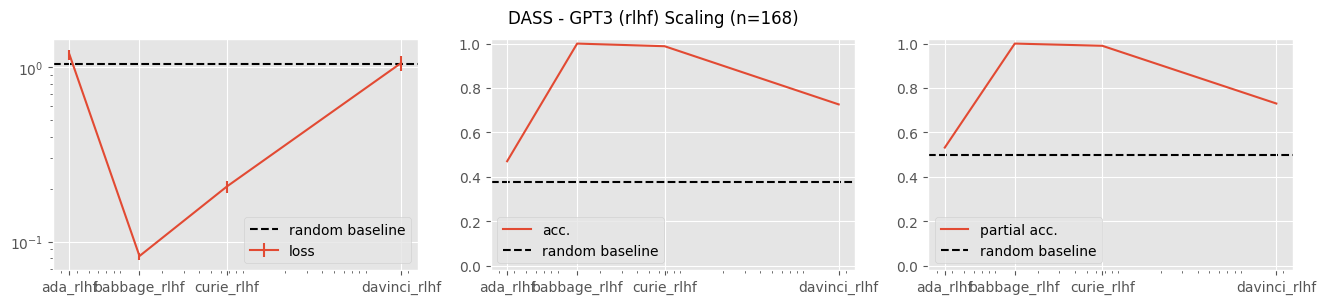

In [18]:
comprehensive_plot(df[df.source_dataset == "dass"], name="DASS")

### TMA

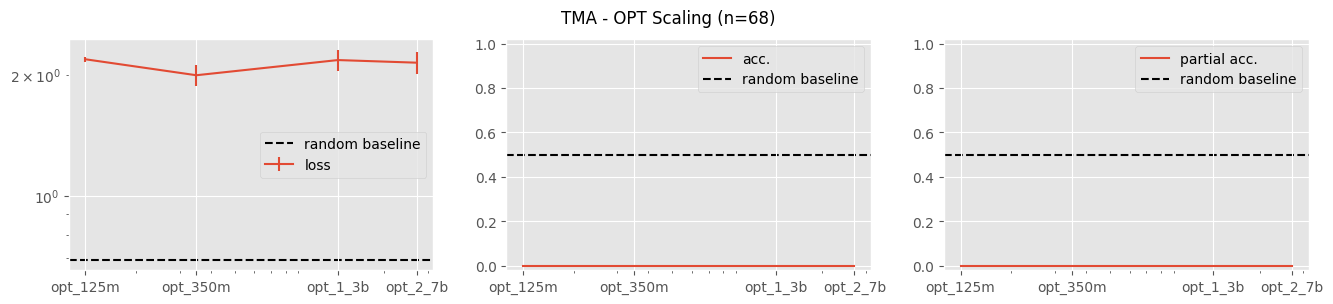

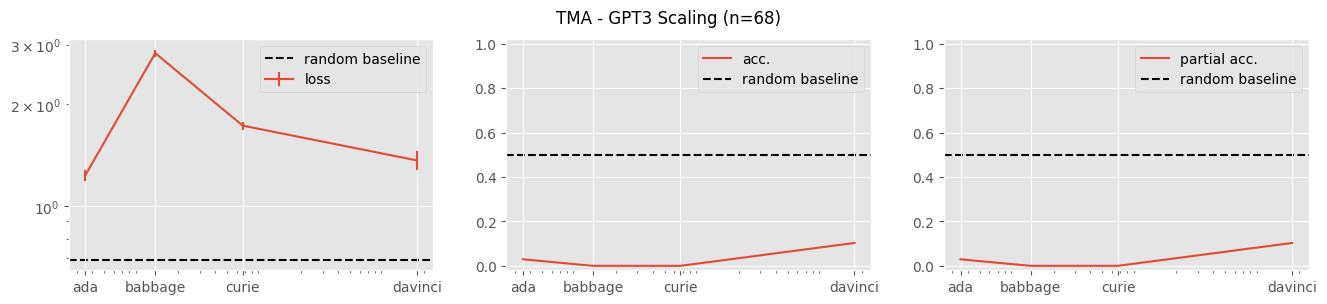

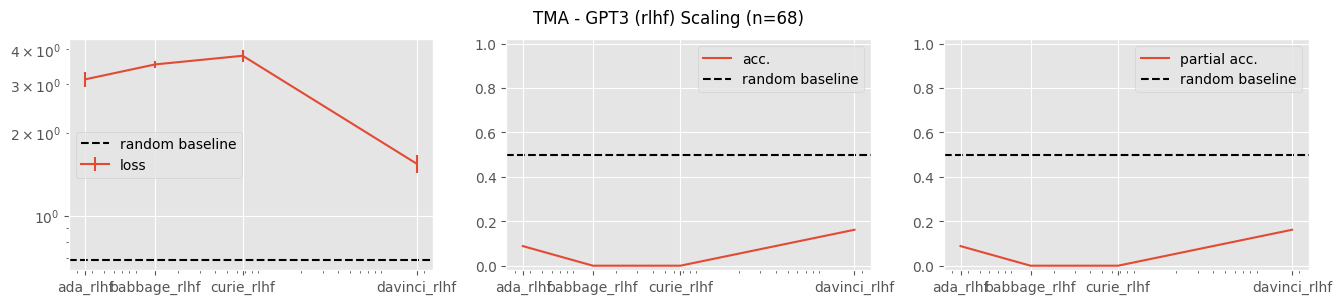

In [19]:
comprehensive_plot(df[df.source_dataset == "tma"], name="TMA")

### Beck hopelessness

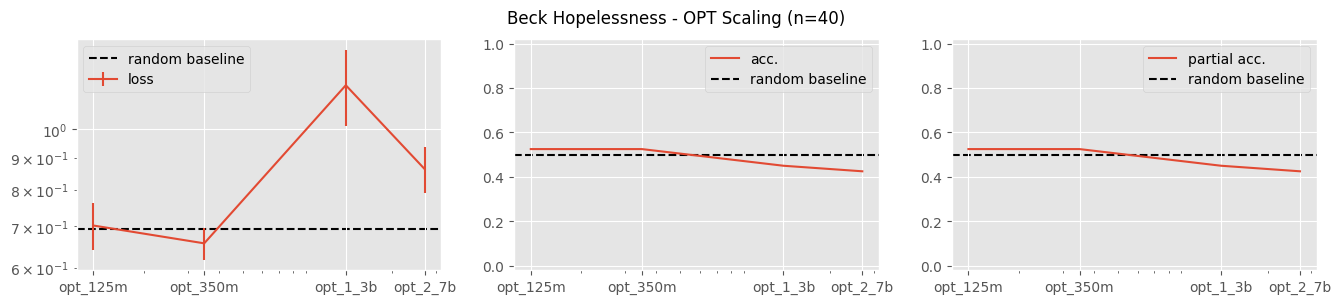

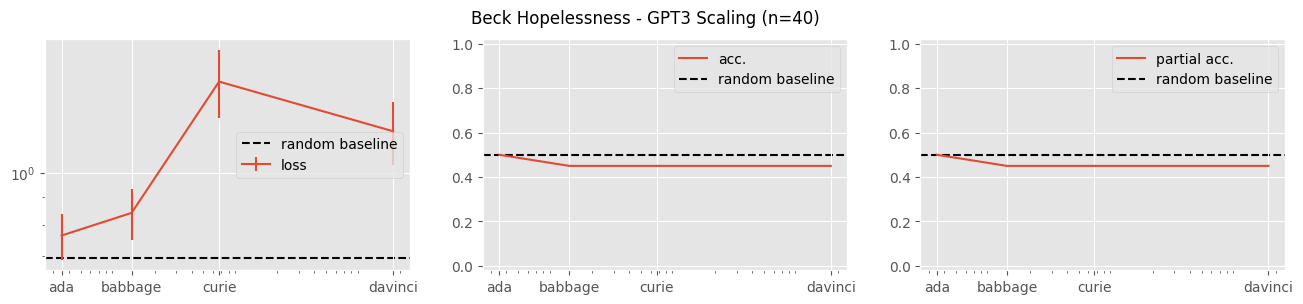

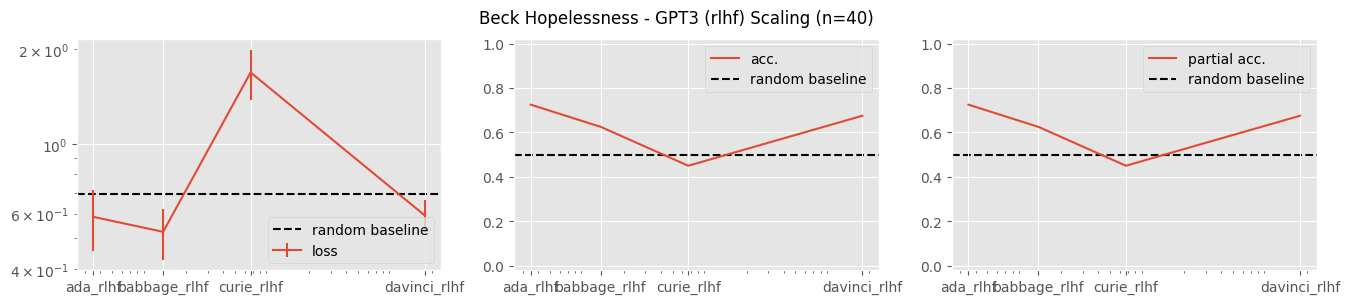

In [20]:
comprehensive_plot(
    df[df.source_dataset == "beck_hopelessness"], name="Beck Hopelessness"
)

### Depression scenarios (Simon)

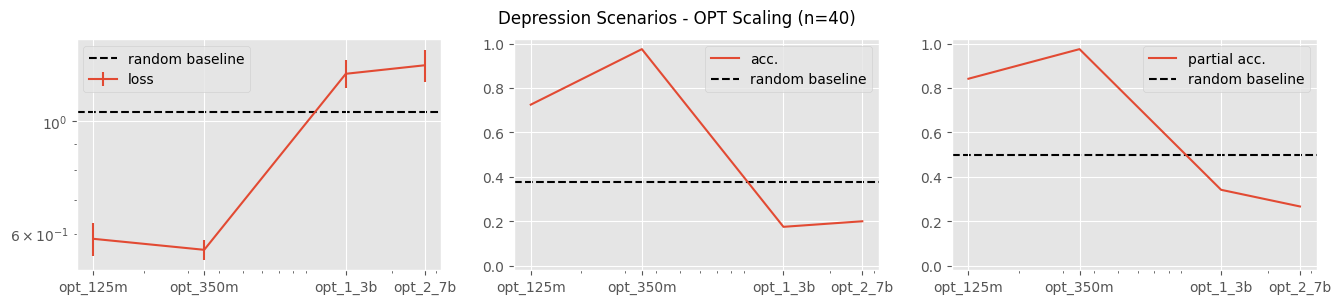

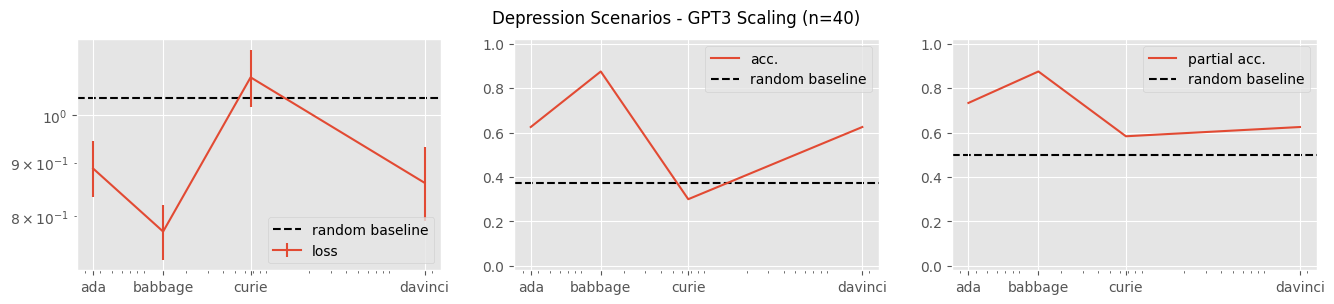

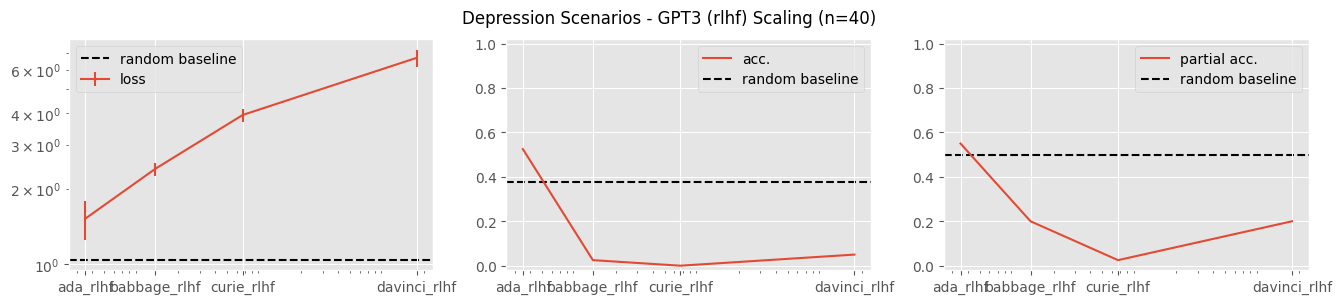

In [21]:
comprehensive_plot(
    df[df.source_dataset == "depression_scenarios"], name="Depression Scenarios"
)

### Geriatric depression

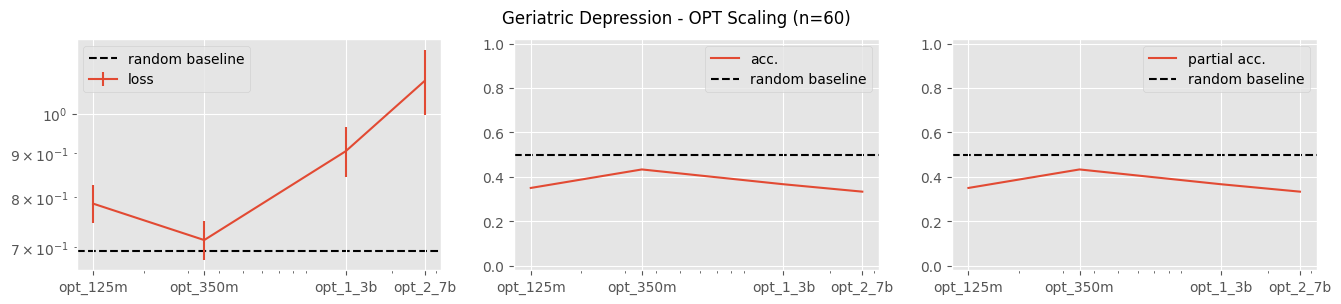

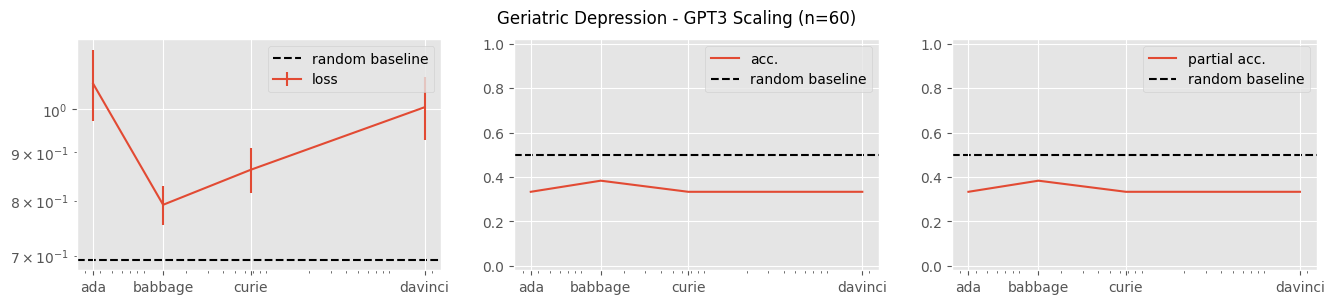

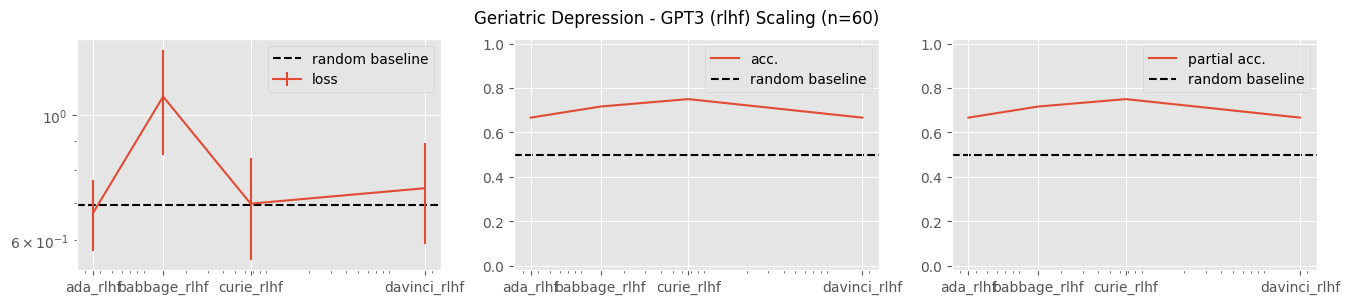

In [22]:
comprehensive_plot(
    df[(df.source_dataset == "geriatric_depression")],
    name="Geriatric Depression",
)


### Levenson Psychopathy

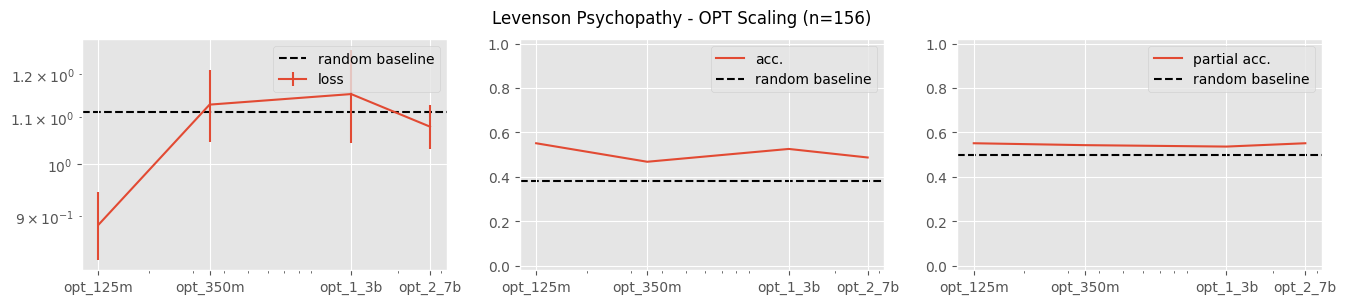

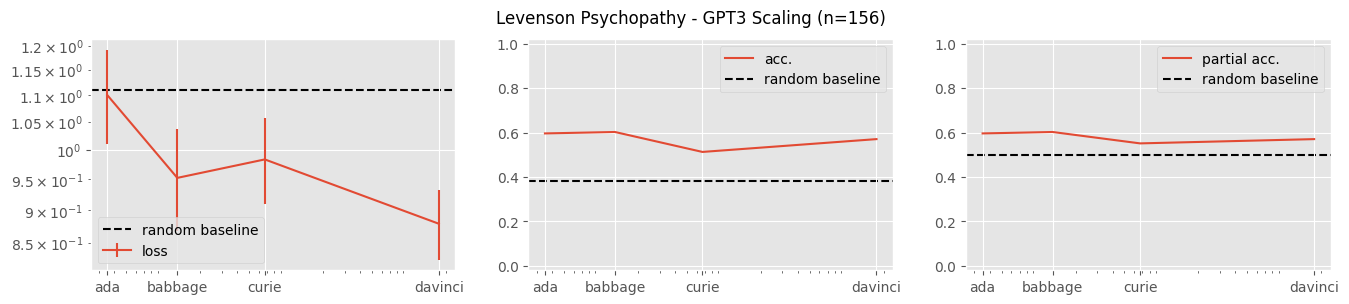

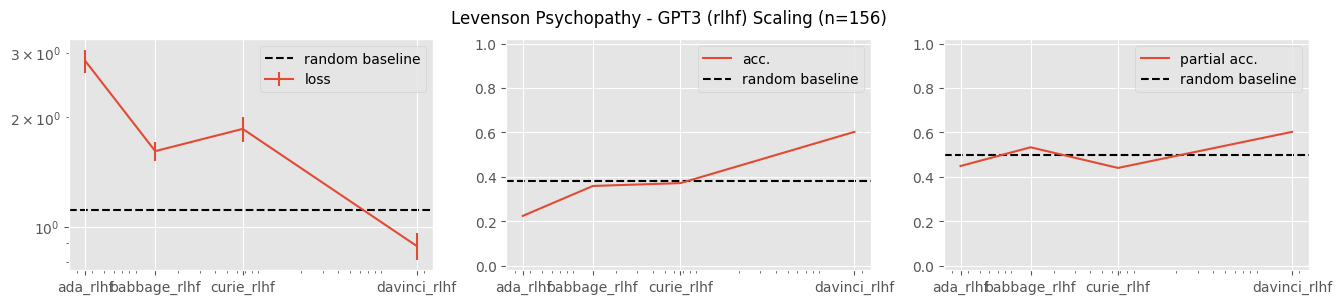

In [23]:
comprehensive_plot(
    df[(df.source_dataset == "levenson_selfreport_psychopathy")],
    name="Levenson Psychopathy",
)

### MMPI

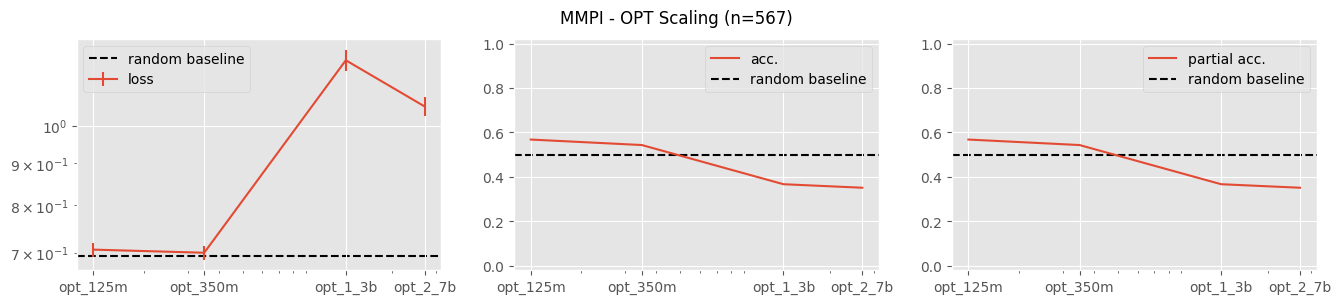

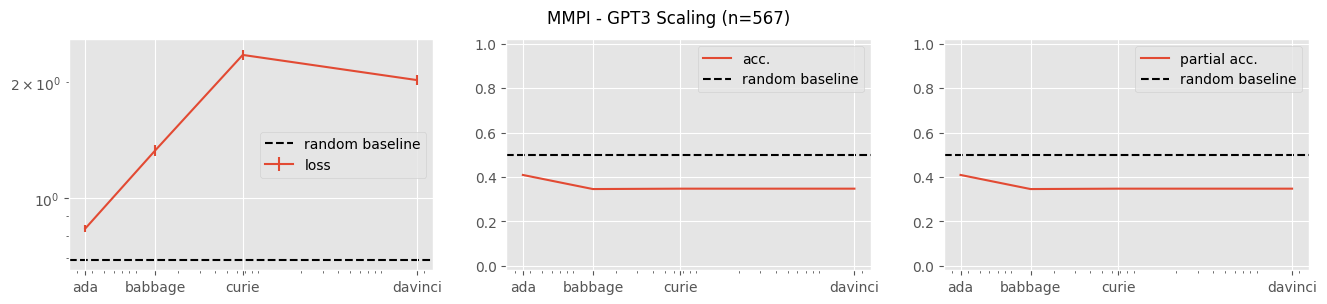

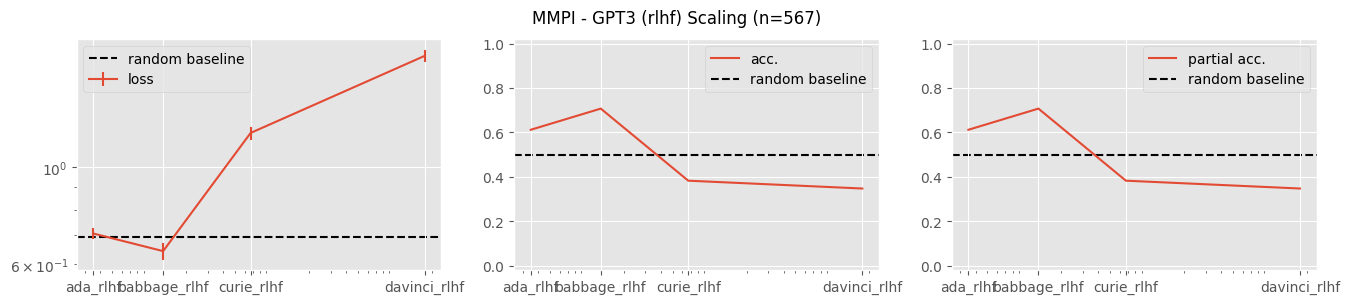

In [24]:
comprehensive_plot(df[df.source_dataset == "mmpi"], name="MMPI")

### PHQ9

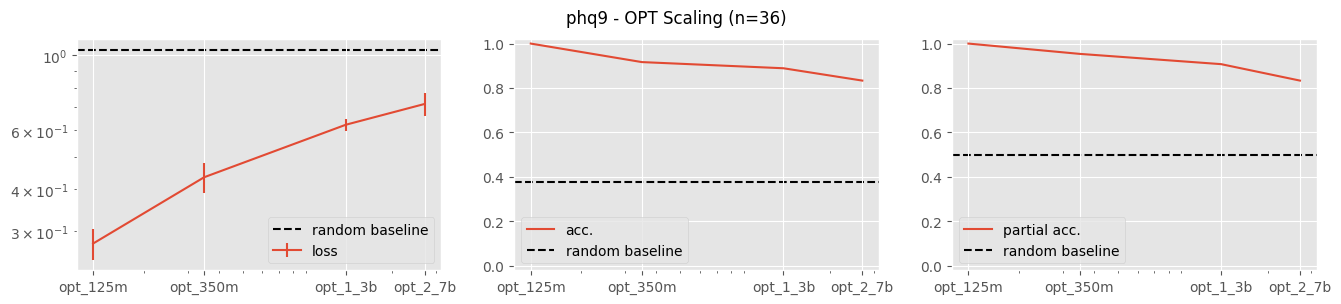

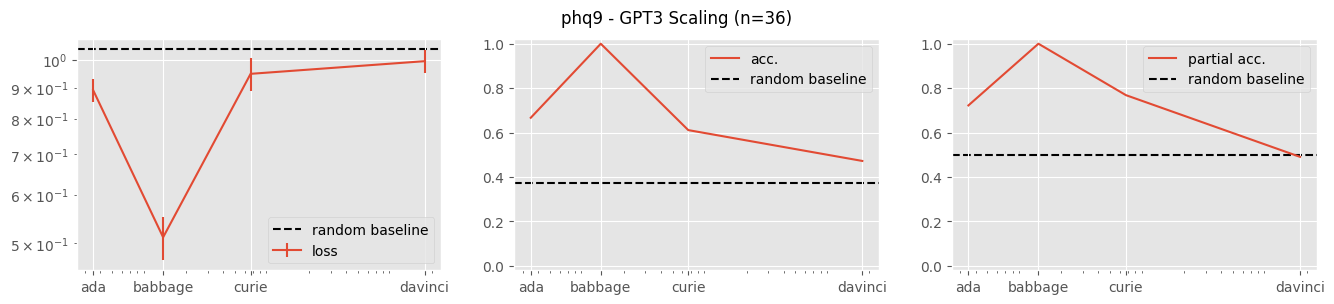

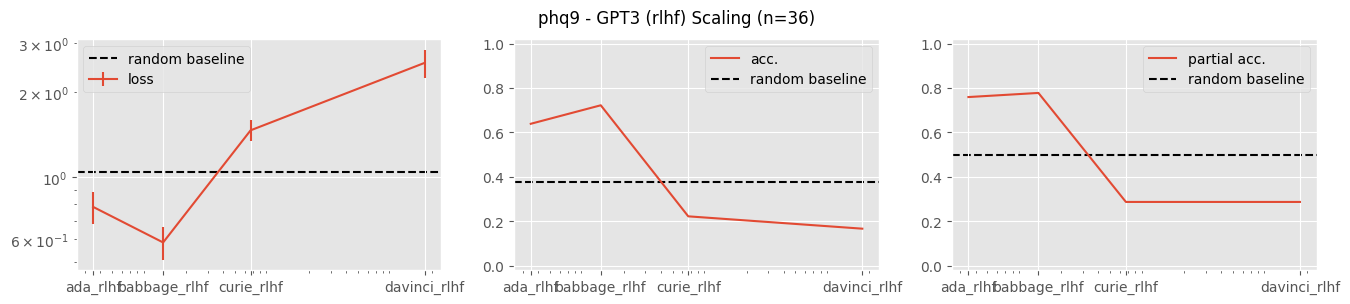

In [25]:
comprehensive_plot(df[df.source_dataset == "phq9"], name="phq9")

### CFCS

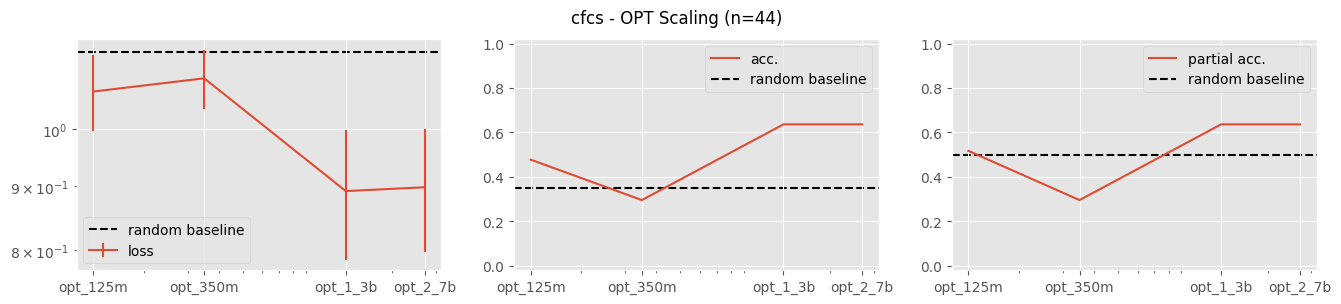

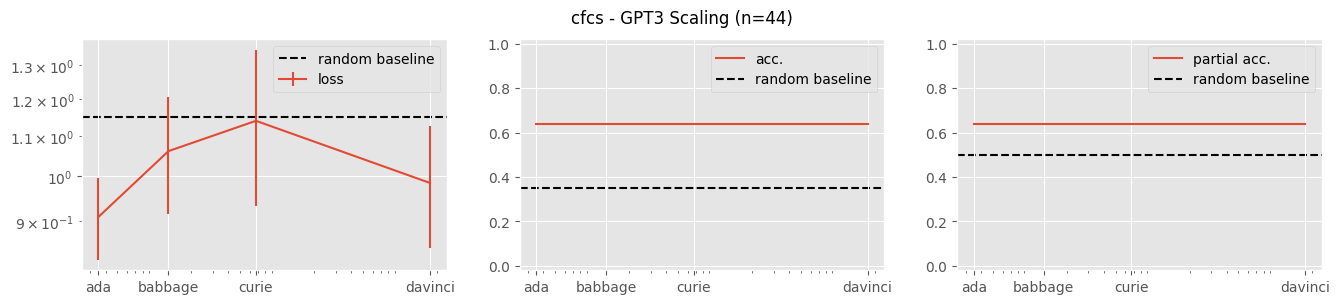

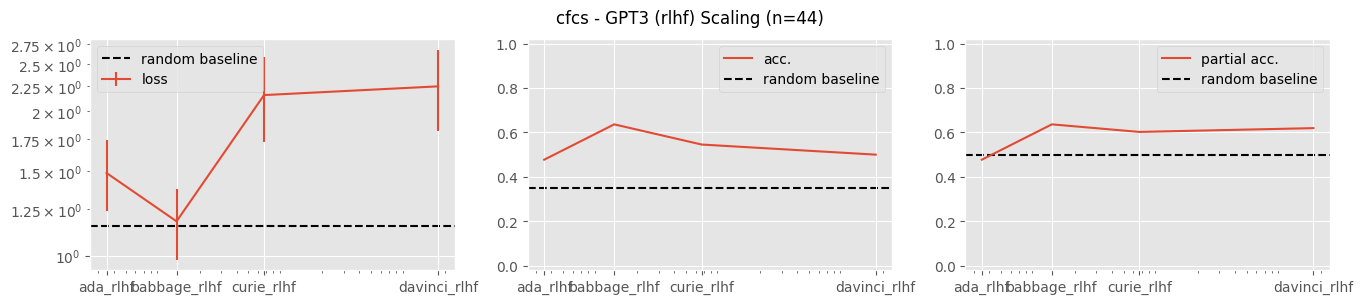

In [26]:
comprehensive_plot(df[df.source_dataset == "cfcs"], name="cfcs")

### HBDS

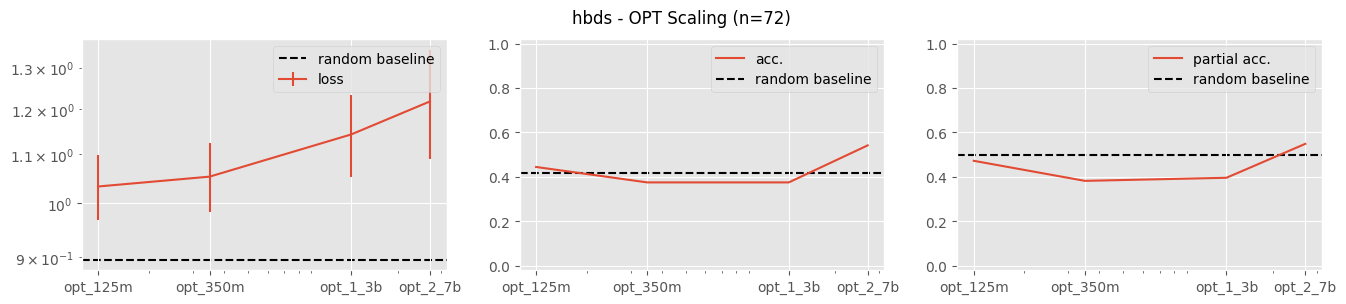

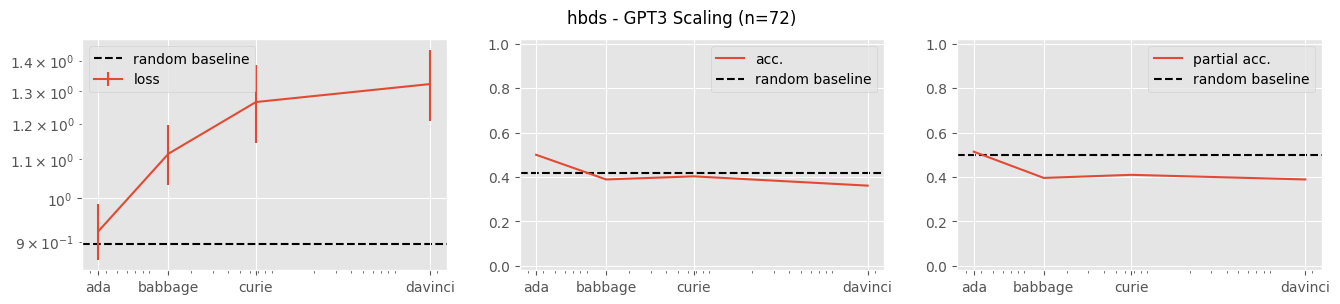

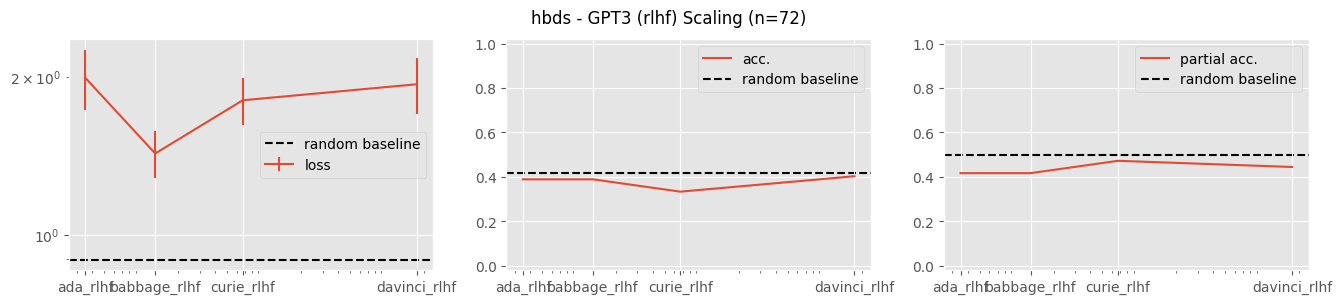

In [27]:
comprehensive_plot(df[df.source_dataset == "hbds"], name="hbds")

### HSNS+DD

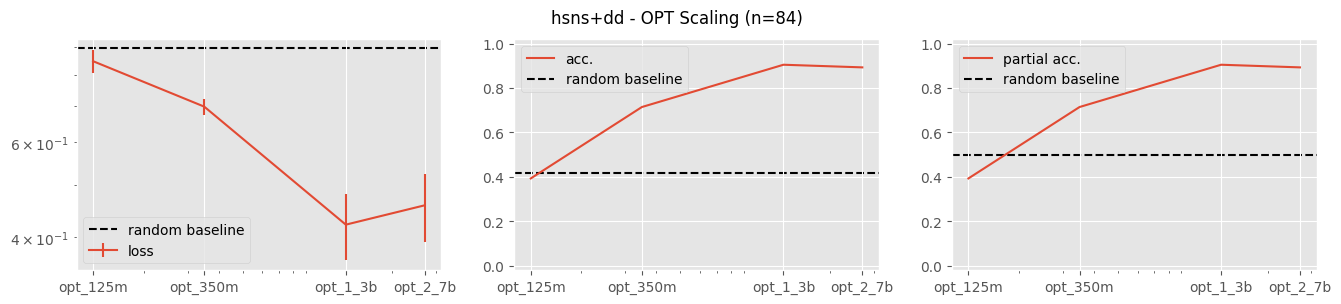

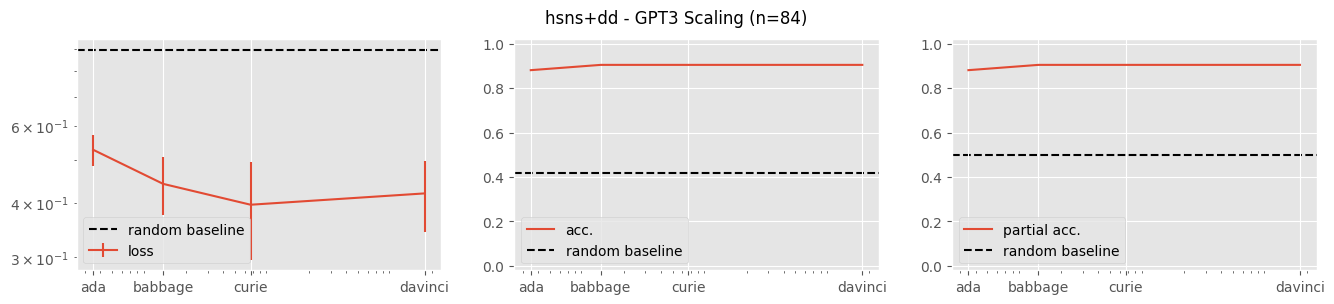

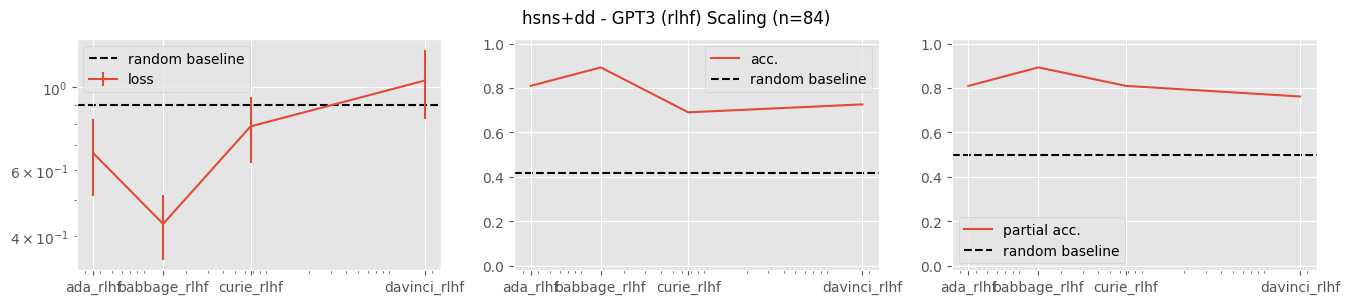

In [28]:
comprehensive_plot(df[df.source_dataset == "hsns+dd"], name="hsns+dd")

### SD3

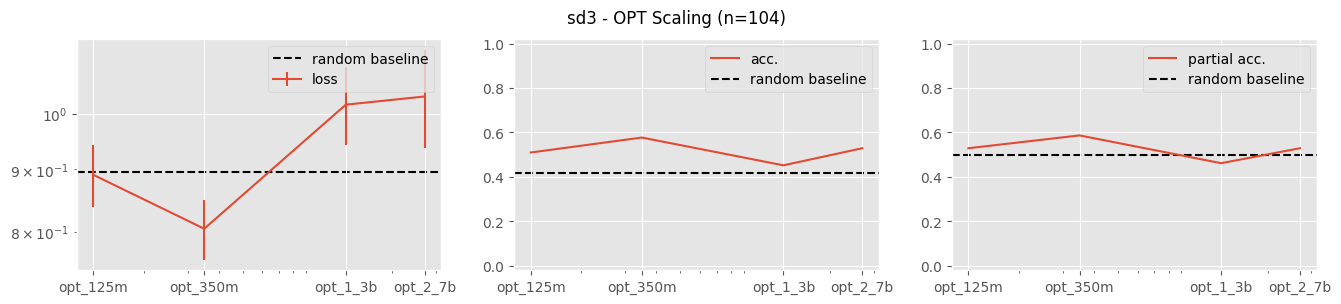

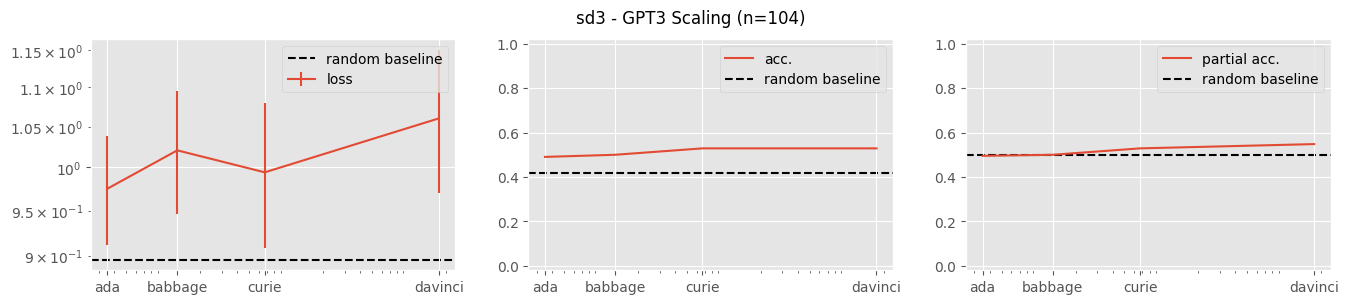

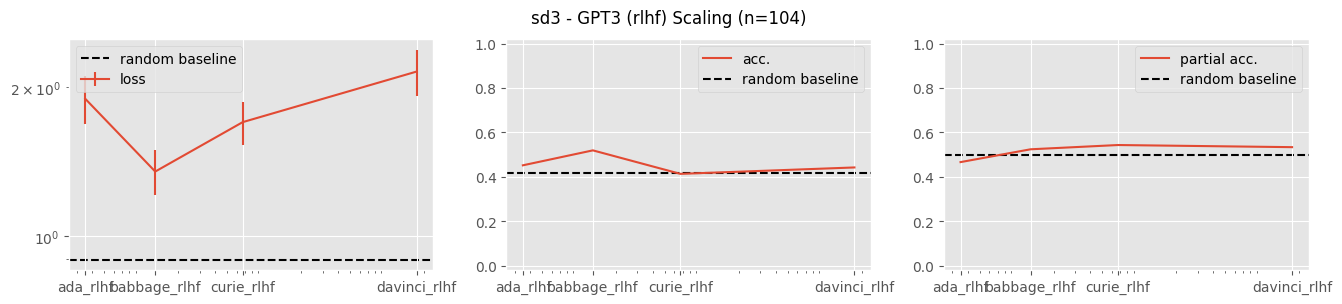

In [29]:
comprehensive_plot(df[df.source_dataset == "sd3"], name="sd3")